### STEP-1 Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### STEP-2 Loading Datasets

In [3]:
train_data = pd.read_csv('tblTrain.csv')
test_data = pd.read_csv('tblTest.csv')

### STEP-3 Plot Rating VS Duration

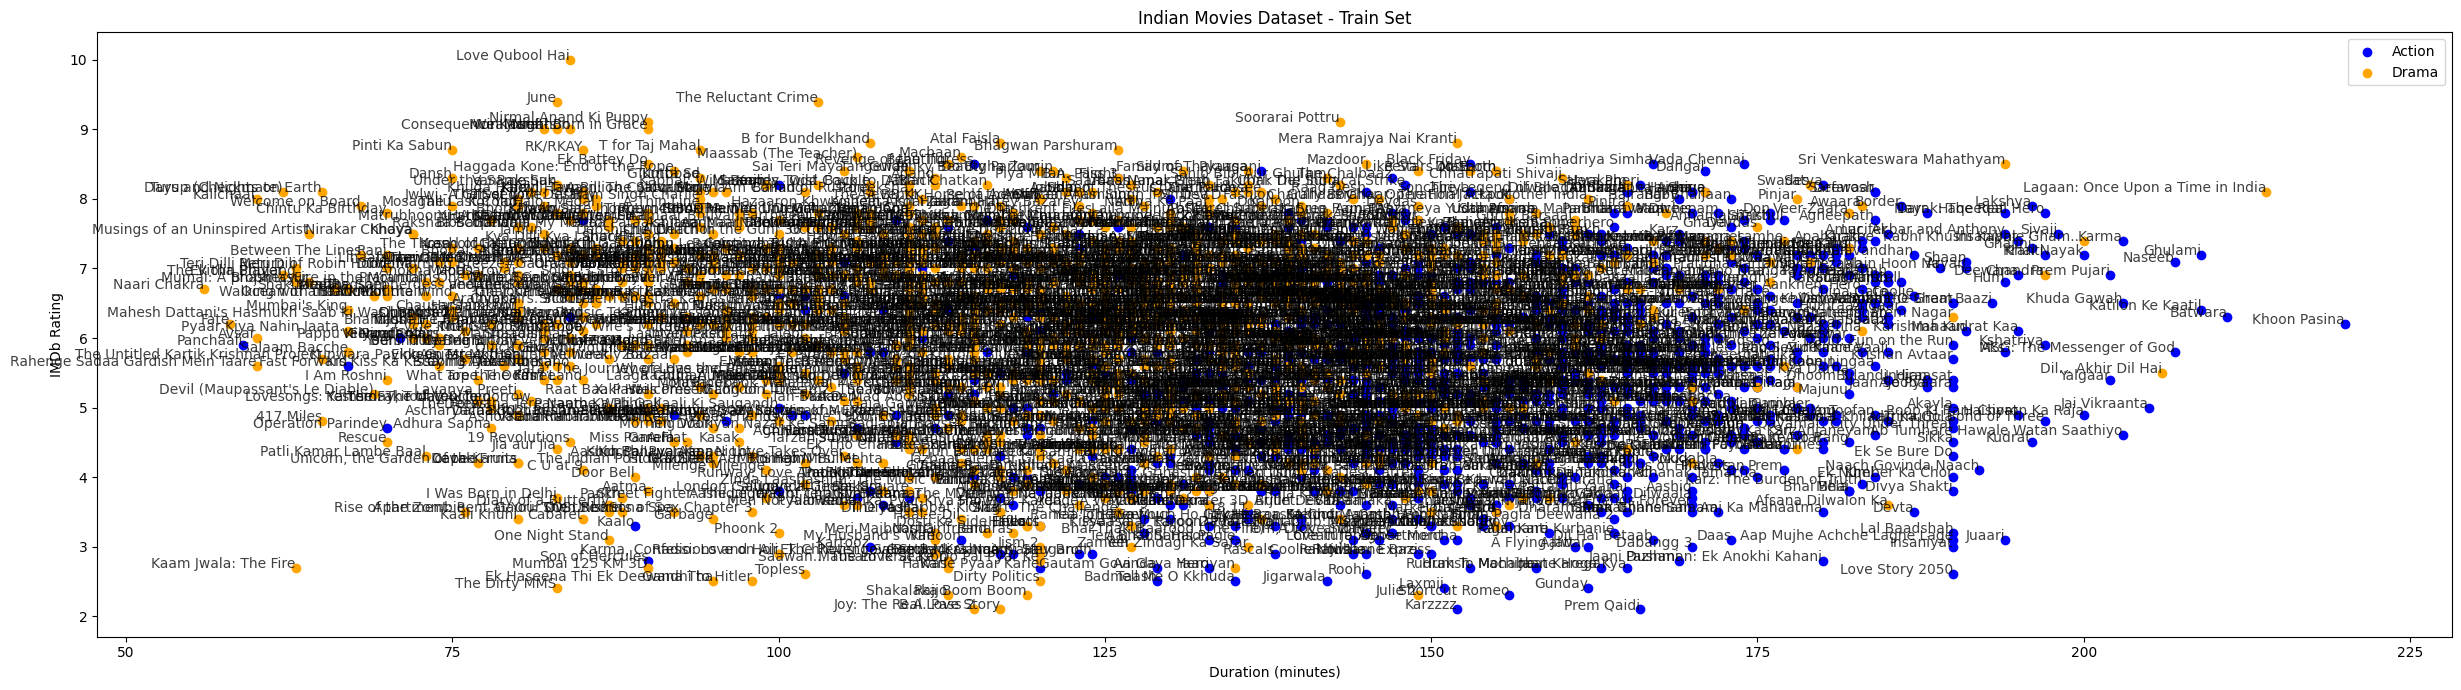

In [17]:
plt.figure(figsize=(25, 7))

for genre, color in [('Action', 'blue'), ('Drama', 'orange')]:
    subset = train_data[train_data['Genre'] == genre]
    plt.scatter(subset['Duration'], subset['Rating'], color=color, label=genre)

for _, row in train_data.iterrows():
    plt.annotate(row['Name'], (row['Duration'], row['Rating']), fontsize=10, ha='right', alpha=0.75)

plt.title('Indian Movies Dataset - Train Set')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.legend()
plt.tight_layout()
plt.show()

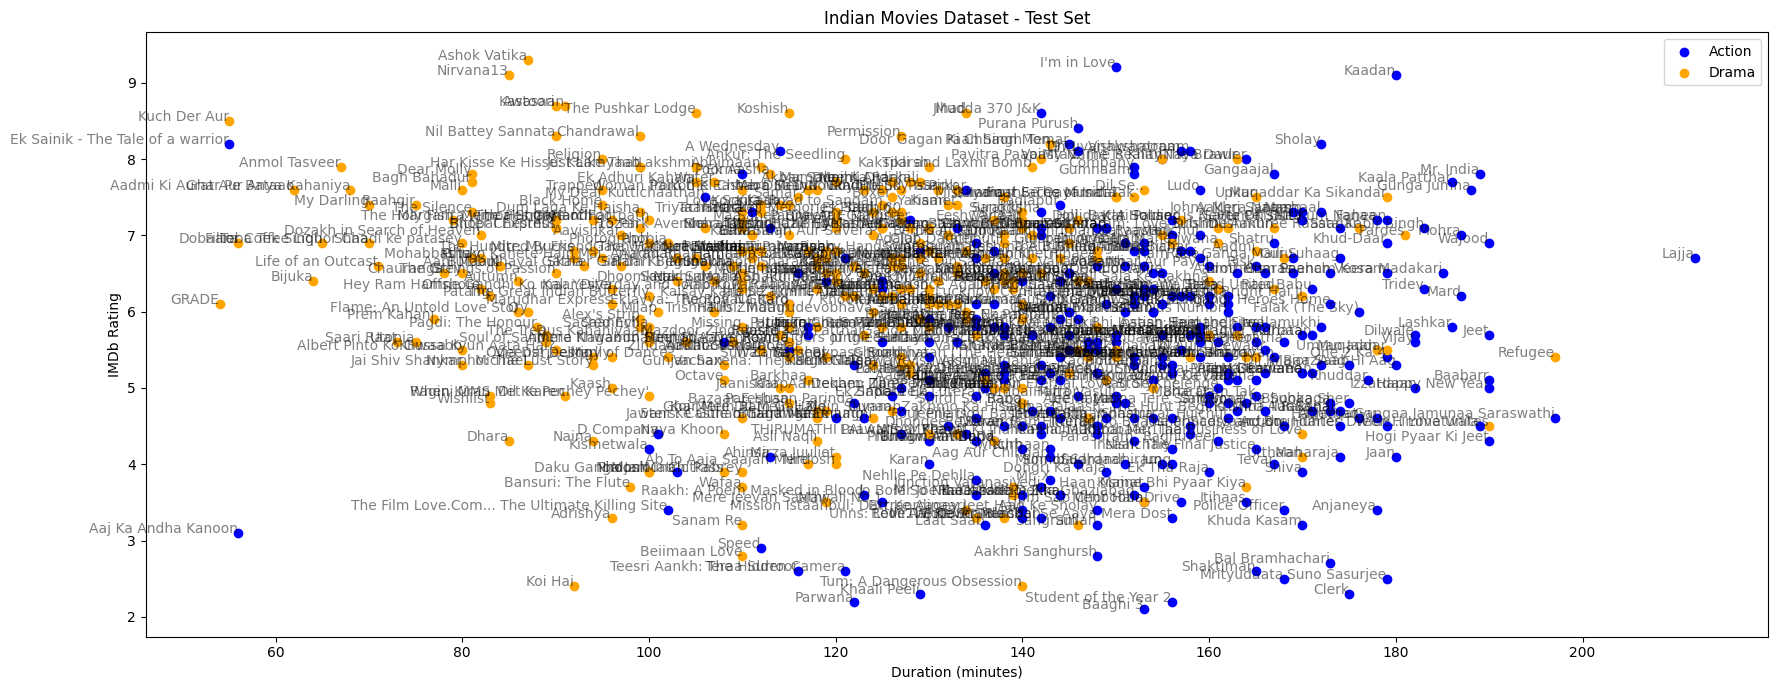

In [14]:
plt.figure(figsize=(18, 7))

for genre, color in [('Action', 'blue'), ('Drama', 'orange')]:
    subset = test_data[test_data['Genre'] == genre]
    plt.scatter(subset['Duration'], subset['Rating'], color=color, label=genre)

for _, row in test_data.iterrows():
    plt.annotate(row['Name'], (row['Duration'], row['Rating']), fontsize=10, ha='right', alpha = 0.5)

plt.title('Indian Movies Dataset - Test Set')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.legend()
plt.tight_layout()
plt.show()

### STEP-4 Model deployment and Evaluation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train = train_data[['Duration', 'Rating']]
y_train = train_data['Genre']

X_test = test_data[['Duration', 'Rating']]
y_test = test_data['Genre']

knn_neighbors = list(range(1, 500, 2))

accuracies = []

for k in knn_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    accuracies.append(accuracy)

### STEP-5  Plot Accuracy vs No. of Neighbors (k)

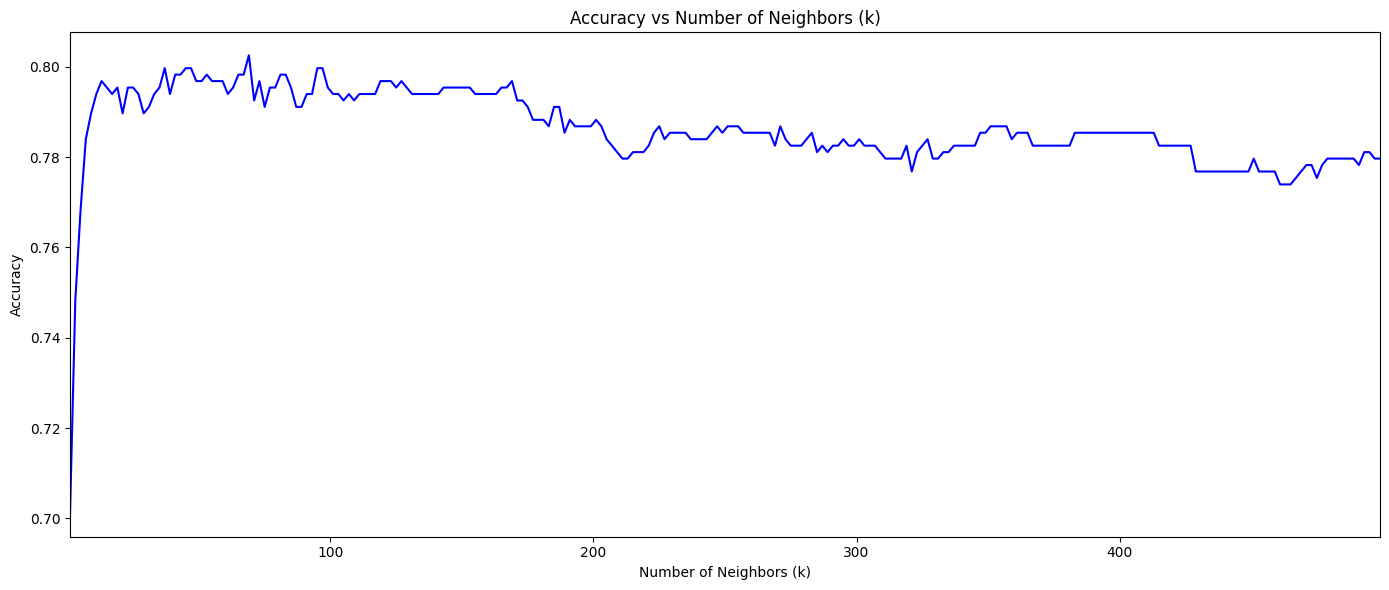

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(knn_neighbors, accuracies, color='blue')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xlim(1, 499)
plt.tight_layout()
plt.show()

### STEP-6 Optimal k, Maximum Accuracy

In [23]:
best_accuracy = max(accuracies)
best_k = knn_neighbors[accuracies.index(best_accuracy)]

print(f"Best k: {best_k}")
print(f"Best Accuracy: {best_accuracy}")

Best k: 69
Best Accuracy: 0.8025751072961373


### Also reporting optimal k just below 69 by keeping in mind model complexity

In [24]:
filtered = [(k, acc) for k, acc in zip(knn_neighbors, accuracies) if k < 69]
best_k_filtered = max(filtered, key=lambda x: x[1])
print(f"Best k (below 69): {best_k_filtered[0]}")
print(f"Best Accuracy (below 69): {best_k_filtered[1]}")

Best k (below 69): 37
Best Accuracy (below 69): 0.7997138769670958


### STEP-7 Reporting Performance Metrics

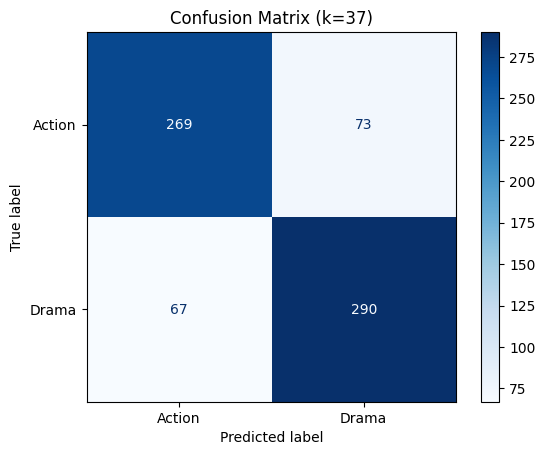

Precision (Action): 0.7989
Precision (Drama):  0.8006
Recall (Action):    0.8123
Recall (Drama):     0.7865
Overall Precision:  0.7997
Overall Recall:     0.7994
F-Score:            0.7996


In [25]:
knn_best = KNeighborsClassifier(n_neighbors=best_k_filtered[0])
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)
TN, FP, FN, TP = cm_best.ravel()

disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=knn_best.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (k={best_k_filtered[0]})')
plt.show()

precision_action = TP / (TP + FP)
precision_drama = TN / (TN + FN)

recall_action = TP / (TP + FN)
recall_drama = TN / (TN + FP)

overall_precision = (precision_action + precision_drama) / 2
overall_recall = (recall_action + recall_drama) / 2

f_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)

print(f"Precision (Action): {precision_action:.4f}")
print(f"Precision (Drama):  {precision_drama:.4f}")
print(f"Recall (Action):    {recall_action:.4f}")
print(f"Recall (Drama):     {recall_drama:.4f}")
print(f"Overall Precision:  {overall_precision:.4f}")
print(f"Overall Recall:     {overall_recall:.4f}")
print(f"F-Score:            {f_score:.4f}")

## Report

#### 1. What does the 'k' value in KNN determine?
'k' defines how many nearest neighbors vote on a data point's class. A small k makes the boundary more sensitive to local data, while a large k smooths it out.

---

#### 2. How is the optimal 'k' value in KNN typically chosen?
By evaluating accuracy (or cross-validation error) across multiple k values and selecting the one that maximizes performance — typically using an Accuracy vs k plot.

---

#### 3. How does the value of 'k' affect variance and bias in KNN?
Low k → low bias, high variance (overfits). High k → high bias, low variance (underfits). Optimal k balances the two for best generalization.

---

#### 4. Is KNN sensitive to outliers, and why?
Yes. With small k, a single outlier can directly influence the predicted class of nearby points since predictions rely purely on distance to neighbors.

---

#### 5. How does the scale of features affect the performance of KNN?
KNN uses distance metrics, so features with larger scales dominate. Feature normalization/standardization is essential to ensure all features contribute equally.